In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np
from collections import Counter

Load Label Information

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data=pd.read_csv("MVSA_Single/labelResultAll.csv")
data

,ID,label
0,1,positive
1,2,positive
2,3,positive
3,4,positive
4,5,positive
5,6,positive
6,7,positive
7,8,positive
8,9,positive
9,10,negative


In [ ]:
data['label'] = data['label'].replace({'negative': 0, 'neutral': 1, 'positive': 2})
data

,ID,label
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,0


In [ ]:
id_list = data['ID'].tolist()
label_list = data['label'].tolist()

Load TXT Data

In [ ]:
# how is the txt saved?
import chardet
encoding_list=[]

for i in range(1010):
  with open('MVSA_Single/data/'+str(i+1)+'.txt', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    encoding_list.append(result['encoding'])
print(encoding_list)

['ascii', 'ISO-8859-1', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'ascii', 'ascii', 'IBM866', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'IBM866', 'Windows-1254', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'IBM866', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'ISO-8859-1', 'Big5', 'ISO-8859-1', 'ascii', 'ascii', 'IBM866', 'ascii', 'ascii', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'IBM866', 'ascii', 'ascii', 'IBM866', 'ascii', 'ascii', 'ascii', 'ascii', 'ISO-8859-1', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'ascii', 'IBM866', 'ascii',

In [ ]:
# decode in the way it is encoded
with open('MVSA_Single/data/'+str(1000)+'.txt', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(result['encoding'])
with open('MVSA_Single/data/'+str(1000)+'.txt', 'r', encoding=result['encoding']) as file:
    content = file.read()
    print(content)
with open('MVSA_Single/data/'+str(2)+'.txt', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(result['encoding'])
with open('MVSA_Single/data/'+str(2)+'.txt', 'r', encoding=result['encoding']) as file:
    content = file.read()
    print(content)

# there is weird character

IBM866
betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't бн 

ISO-8859-1
grattis min griskulting!!!???? va bara tvungen oki s? sch ? @ingenkommeratttrodig #pig #happybday #wow #lovely #cut¡­ 



In [ ]:
# decode by 'ascii' and ignore the error
with open('MVSA_Single/data/'+str(1000)+'.txt', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(result['encoding'])
with open('MVSA_Single/data/'+str(1000)+'.txt', 'r', encoding='ascii', errors='ignore') as file:
    content = file.read()
    print(content)
with open('MVSA_Single/data/'+str(2)+'.txt', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(result['encoding'])
with open('MVSA_Single/data/'+str(2)+'.txt', 'r', encoding='ascii', errors='ignore') as file:
    content = file.read()
    print(content)

# better character

IBM866
betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't  

ISO-8859-1
grattis min griskulting!!!???? va bara tvungen oki s? sch ? @ingenkommeratttrodig #pig #happybday #wow #lovely #cut 



Data Preprocess

In [ ]:
!pip install nltk

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 1.5 MB 189 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 183 kB/s eta 0:00:01
     |████████████████████████████████| 778 kB 186 kB/s eta 0:00:01


In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# stopwords(help remain the most useful information)
#nltk.download('stopwords')
stop_words = stopwords.words("english")
wordnet = WordNetLemmatizer()

In [ ]:
img_list = []
text_list = []
lb_list = []
img_dir='MVSA_Single/data'
text_dir='MVSA_Single/data'

# remove punctuation marks
img_list, text_list, lb_list = data_filter(img_dir, text_dir, id_list, label_list)
print(text_list)

['feel today legday jelly aching gym ', 'grattis min griskulting va bara tvungen oki s sch pig happybday wow lovely cut ', ' moment found favourite tv character profoundlove ', ' escoyoung energetic team pride offering highes hoer ', ' went ssc today movie star rep deaf got meet energetic great guy mark white ', ' that really energetic ', ' hard working fun loving energetic team thank love you ', 'energetic training today san antonio new dollars new partners trainees ', 'look photo feel anger speakup peace speak equality speak tolerance ', ' absolute disgrace two carriages bangor half way standing room disgraced ', ' proud kids talented energetic hardworking respectful kind hearted ', ' everybody think candles liberty london love feel valentinesday ', 'can even tell guys much love covers invaded alienated prettycovers ', ' energetic tells us sister the evil bumface world wayword chester ht ', 'awesome record keepin night energetic ', ' manifestation energetic potential truth quote divi

In [ ]:
# fewer special words may prevent overfitting

Basic Info of Data

In [ ]:
negative=0
neutral=0
positive=0
for i in lb_list:
    if i==0:
        negative+=1
    elif i==1:
        neutral+=1
    elif i==2:
        positive+=1
print('negative: ',negative)
print('neutral: ',neutral)
print('positive: ',positive)

# more 'positive' than other labels

negative:  1223
neutral:  938
positive:  2708


In [ ]:
# max sentence length
max_text = max(len(sentence.split()) for sentence in text_list)
print('max text length: ', max_text)

# size of vocabulary
vocab=build_vocab(text_list)
vocab_size = len(vocab)
print('size of vocabulary： ', vocab_size)

max text length:  21
size of vocabulary：  12326


Build Dataset

In [ ]:
# resize, to tensor and normalization for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# dataset
dataset = CustomMultiModalDataset(
    img_list = img_list,
    text_list = text_list,
    lb_list = lb_list,
    transform=transform,
    max_text=max_text,
    vocab = vocab
)

# split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

IMAGE

/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 1.0563, Test Loss: 0.9179, Accuracy: 59.45%
Epoch 2/10, Train Loss: 0.9047, Test Loss: 0.9202, Accuracy: 60.27%
Epoch 3/10, Train Loss: 0.8665, Test Loss: 0.8787, Accuracy: 62.32%
Epoch 4/10, Train Loss: 0.8025, Test Loss: 1.0329, Accuracy: 55.85%
Epoch 5/10, Train Loss: 0.7591, Test Loss: 0.9179, Accuracy: 60.78%
Epoch 6/10, Train Loss: 0.6869, Test Loss: 1.0077, Accuracy: 48.87%
Epoch 7/10, Train Loss: 0.6168, Test Loss: 1.1249, Accuracy: 56.57%
Epoch 8/10, Train Loss: 0.5273, Test Loss: 1.2516, Accuracy: 47.64%
Epoch 9/10, Train Loss: 0.4287, Test Loss: 1.3665, Accuracy: 49.49%
Epoch 10/10, Train Loss: 0.3601, Test Loss: 1.2829, Accuracy: 56.78%


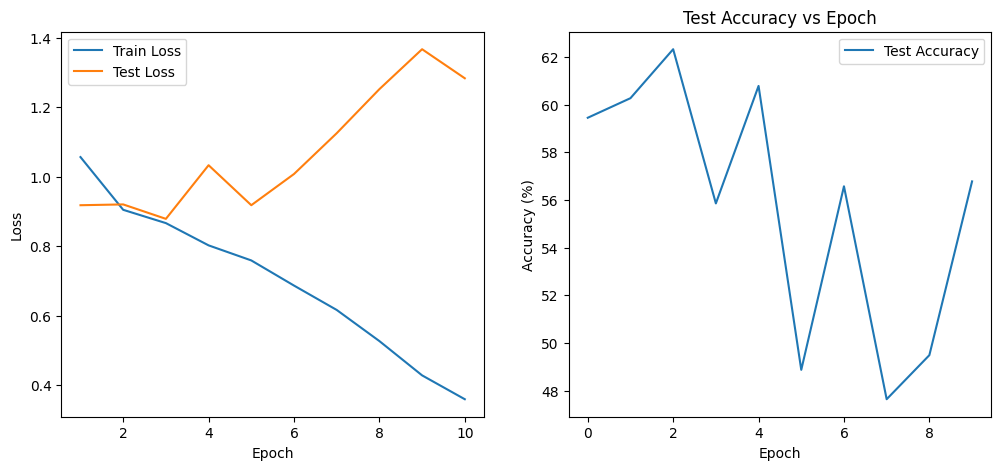

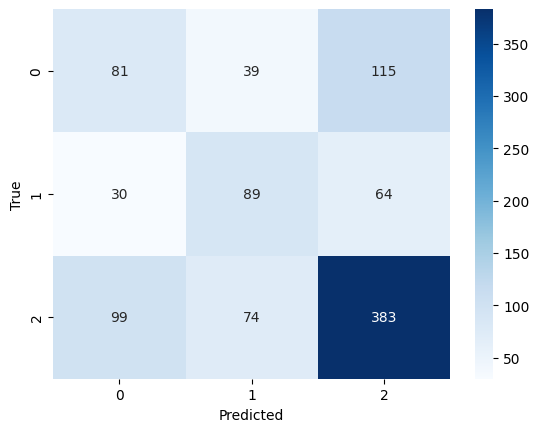

In [ ]:
embed_size = 100
hidden_size = 64
output_size = 3
num_epochs = 10

# the images are more complex than those in MNIST, so use pretrained model
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, image_model_type='resnet18')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

resnet_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image')

/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.9676, Test Loss: 0.8778, Accuracy: 61.09%
Epoch 2/10, Train Loss: 0.8727, Test Loss: 0.8729, Accuracy: 59.65%
Epoch 3/10, Train Loss: 0.8436, Test Loss: 0.8399, Accuracy: 62.83%
Epoch 4/10, Train Loss: 0.8264, Test Loss: 0.8326, Accuracy: 63.35%
Epoch 5/10, Train Loss: 0.8135, Test Loss: 0.8351, Accuracy: 63.35%
Epoch 6/10, Train Loss: 0.7994, Test Loss: 0.8898, Accuracy: 57.29%
Epoch 7/10, Train Loss: 0.7925, Test Loss: 0.8264, Accuracy: 64.58%
Epoch 8/10, Train Loss: 0.7827, Test Loss: 0.8460, Accuracy: 61.09%
Epoch 9/10, Train Loss: 0.7929, Test Loss: 0.8535, Accuracy: 62.83%
Epoch 10/10, Train Loss: 0.7840, Test Loss: 0.8262, Accuracy: 63.76%


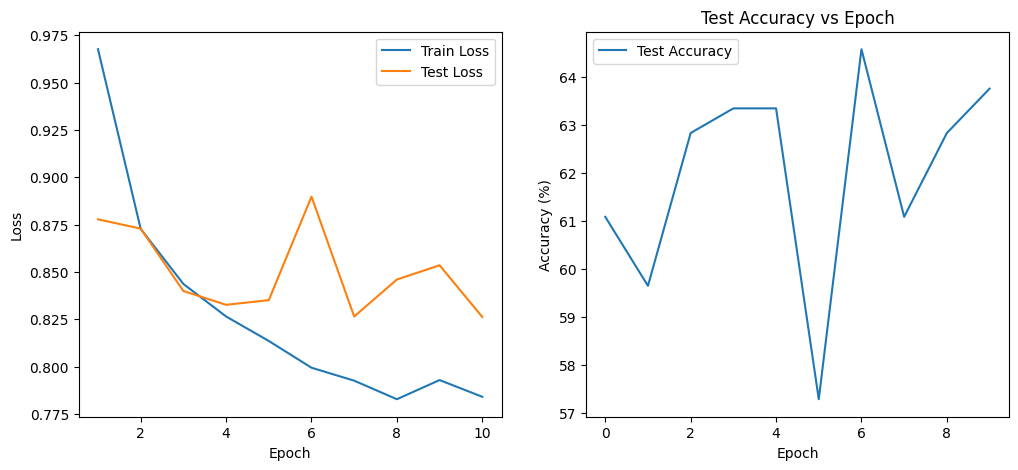

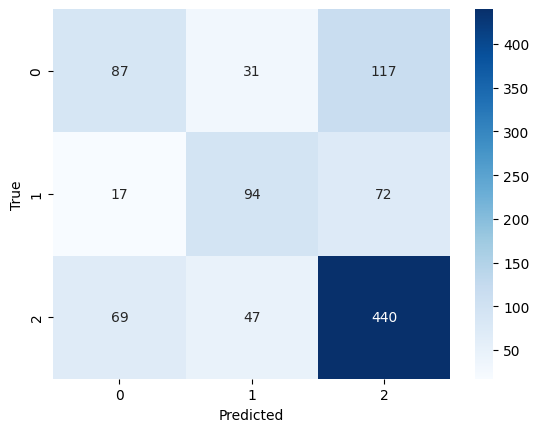

In [ ]:
# freeze the gradient?
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, image_model_type='resnet18', freeze=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

resnet_freeze_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image')

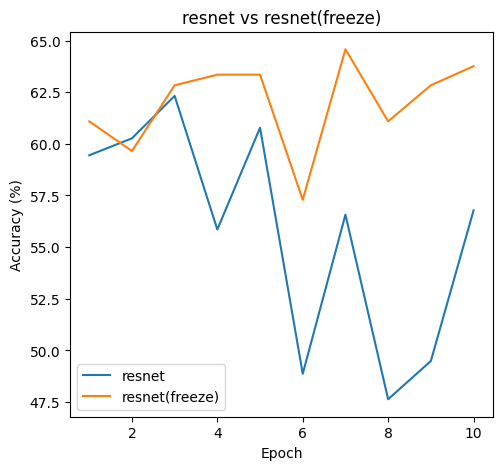

In [ ]:
# resnet vs resnet(freeze)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), resnet_accu, label='resnet')
plt.plot(range(1, num_epochs+1), resnet_freeze_accu, label='resnet(freeze)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('resnet vs resnet(freeze)')
plt.legend()

/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 1.0850, Test Loss: 0.9204, Accuracy: 52.16%
Epoch 2/10, Train Loss: 0.8791, Test Loss: 0.8430, Accuracy: 61.29%
Epoch 3/10, Train Loss: 0.7176, Test Loss: 0.9082, Accuracy: 60.47%
Epoch 4/10, Train Loss: 0.5185, Test Loss: 1.2806, Accuracy: 60.16%
Epoch 5/10, Train Loss: 0.3778, Test Loss: 1.3938, Accuracy: 64.07%
Epoch 6/10, Train Loss: 0.3078, Test Loss: 2.0288, Accuracy: 52.05%
Epoch 7/10, Train Loss: 0.3589, Test Loss: 1.6749, Accuracy: 61.50%
Epoch 8/10, Train Loss: 0.2768, Test Loss: 1.7111, Accuracy: 60.27%
Epoch 9/10, Train Loss: 0.2429, Test Loss: 2.3755, Accuracy: 64.07%
Epoch 10/10, Train Loss: 0.3132, Test Loss: 2.2478, Accuracy: 62.94%


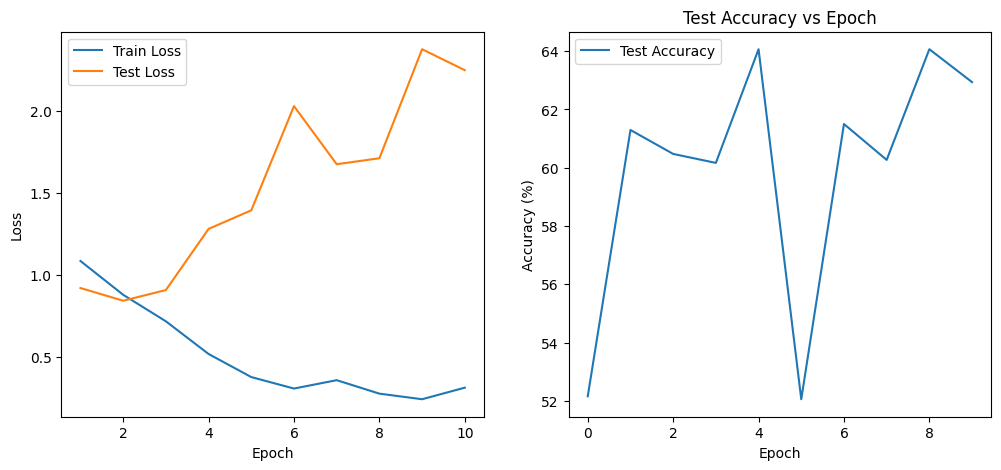

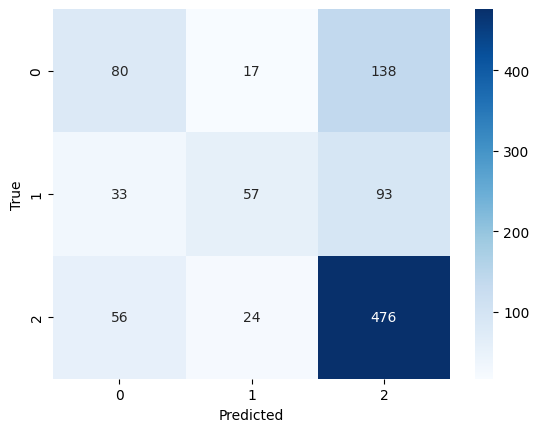

In [ ]:
# resnet vs vgg
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, image_model_type='vgg16', freeze=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

vgg_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image')

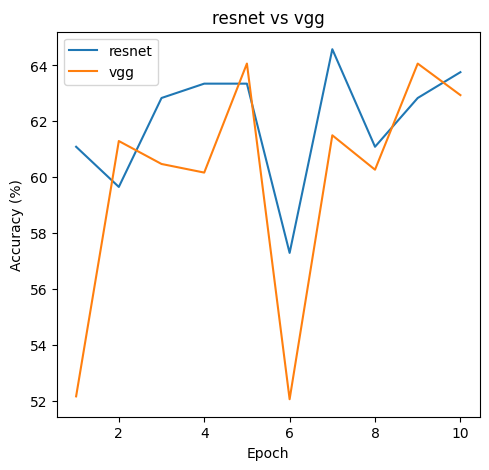

In [ ]:
# resnet vs vgg
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), resnet_freeze_accu, label='resnet')
plt.plot(range(1, num_epochs+1), vgg_accu, label='vgg')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('resnet vs vgg')
plt.legend()

TEXT

In [ ]:
embed_size = 100
hidden_size = 64
output_size = 3
num_epochs = 10

Epoch 1/10, Train Loss: 1.0199, Test Loss: 0.9856, Accuracy: 57.08%
Epoch 2/10, Train Loss: 1.0058, Test Loss: 0.9850, Accuracy: 57.08%
Epoch 3/10, Train Loss: 0.9931, Test Loss: 0.9772, Accuracy: 57.08%
Epoch 4/10, Train Loss: 0.9593, Test Loss: 0.9741, Accuracy: 55.44%
Epoch 5/10, Train Loss: 0.8758, Test Loss: 0.9848, Accuracy: 54.00%
Epoch 6/10, Train Loss: 0.7414, Test Loss: 1.0356, Accuracy: 55.13%
Epoch 7/10, Train Loss: 0.5774, Test Loss: 1.1239, Accuracy: 52.77%
Epoch 8/10, Train Loss: 0.4142, Test Loss: 1.2884, Accuracy: 52.77%
Epoch 9/10, Train Loss: 0.2906, Test Loss: 1.4339, Accuracy: 54.00%
Epoch 10/10, Train Loss: 0.2197, Test Loss: 1.5536, Accuracy: 52.46%


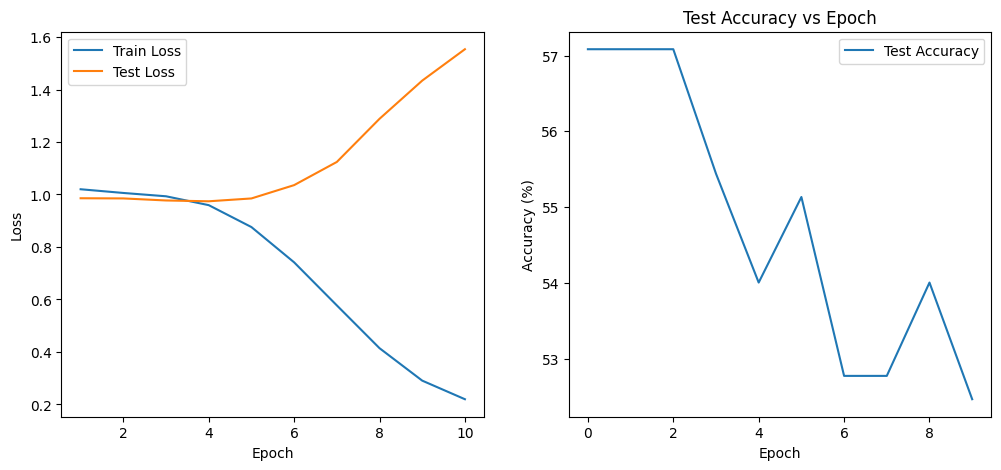

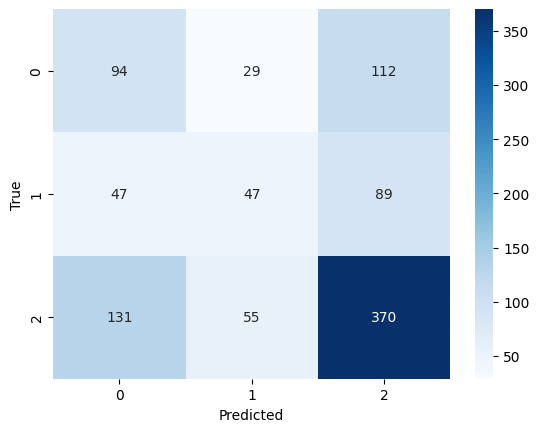

In [ ]:
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, text_model_type='GRU')
optimizer = optim.Adam(model.parameters(), lr=0.001)
gru_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='text')

In [ ]:
# pretrained embedding
glove_file = 'glove.6B.100d.txt'
embedding_dict = load_glove_embeddings(glove_file)

embedding_matrix = np.zeros((vocab_size, embed_size))
for word, index in vocab.items():
    vector = embedding_dict.get(word)
    if vector is not None:
        embedding_matrix[index] = vector

pre_embedding = nn.Embedding(vocab_size, embed_size)
pre_embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
pre_embedding.weight.requires_grad = False  # freeze

Epoch 1/10, Train Loss: 1.0105, Test Loss: 0.9810, Accuracy: 57.08%
Epoch 2/10, Train Loss: 0.9793, Test Loss: 0.9410, Accuracy: 56.67%
Epoch 3/10, Train Loss: 0.9413, Test Loss: 0.9191, Accuracy: 58.62%
Epoch 4/10, Train Loss: 0.9210, Test Loss: 0.9049, Accuracy: 59.65%
Epoch 5/10, Train Loss: 0.9097, Test Loss: 0.9060, Accuracy: 59.65%
Epoch 6/10, Train Loss: 0.8965, Test Loss: 0.9039, Accuracy: 61.40%
Epoch 7/10, Train Loss: 0.8790, Test Loss: 0.9056, Accuracy: 60.99%
Epoch 8/10, Train Loss: 0.8682, Test Loss: 0.9273, Accuracy: 58.73%
Epoch 9/10, Train Loss: 0.8495, Test Loss: 0.9182, Accuracy: 59.55%
Epoch 10/10, Train Loss: 0.8228, Test Loss: 0.9307, Accuracy: 59.34%


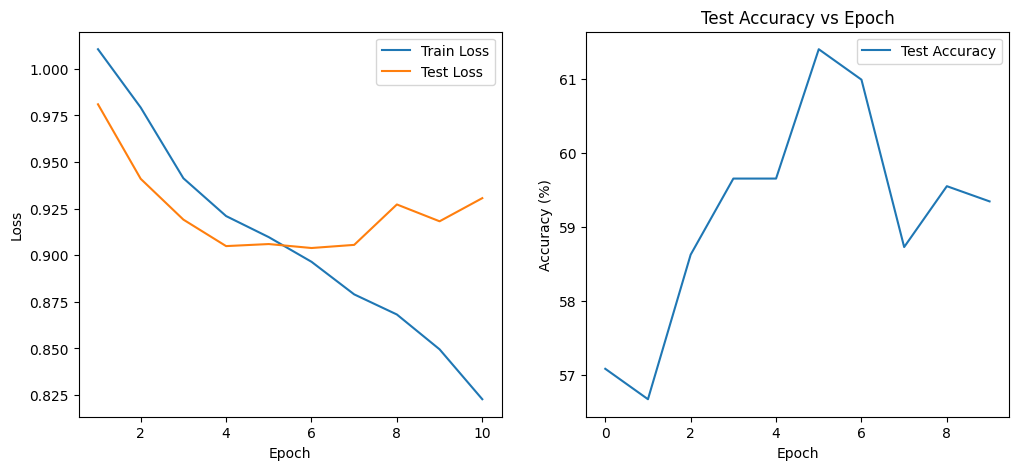

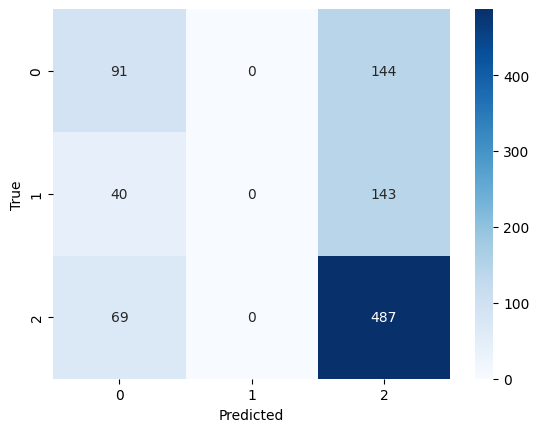

In [ ]:
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, text_model_type='GRU', text_pretrained=pre_embedding)
optimizer = optim.Adam(model.parameters(), lr=0.001)
gru_pre_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='text')

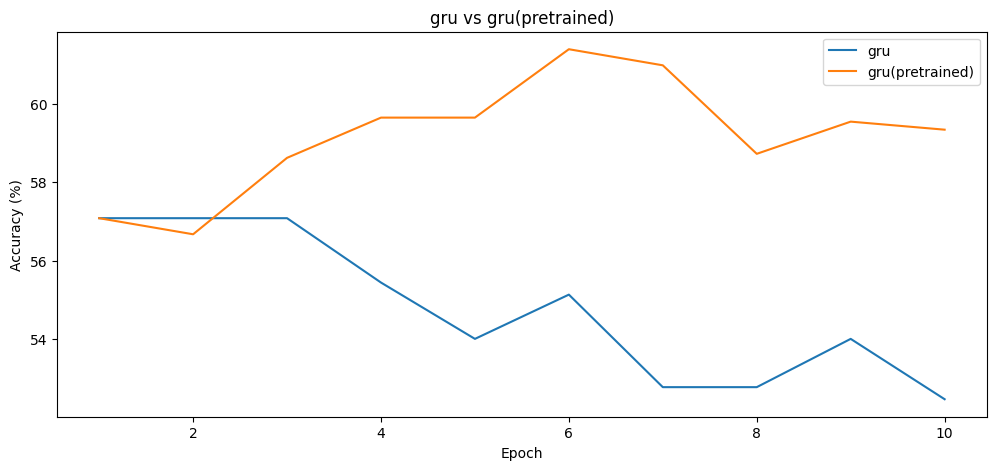

In [ ]:
# gru vs gru(pretrained)
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), gru_accu, label='gru')
plt.plot(range(1, num_epochs+1), gru_pre_accu, label='gru(pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('gru vs gru(pretrained)')
plt.legend()

In [ ]:
# GRU vs RNN vs LSTM

Epoch 1/10, Train Loss: 1.0097, Test Loss: 0.9915, Accuracy: 56.98%
Epoch 2/10, Train Loss: 0.9999, Test Loss: 0.9869, Accuracy: 56.98%
Epoch 3/10, Train Loss: 0.9996, Test Loss: 0.9858, Accuracy: 56.98%
Epoch 4/10, Train Loss: 0.9947, Test Loss: 0.9878, Accuracy: 56.88%
Epoch 5/10, Train Loss: 0.9910, Test Loss: 0.9825, Accuracy: 56.98%
Epoch 6/10, Train Loss: 0.9877, Test Loss: 0.9789, Accuracy: 56.98%
Epoch 7/10, Train Loss: 0.9811, Test Loss: 0.9794, Accuracy: 56.88%
Epoch 8/10, Train Loss: 0.9747, Test Loss: 0.9688, Accuracy: 56.16%
Epoch 9/10, Train Loss: 0.9659, Test Loss: 0.9511, Accuracy: 57.19%
Epoch 10/10, Train Loss: 0.9575, Test Loss: 0.9558, Accuracy: 56.16%


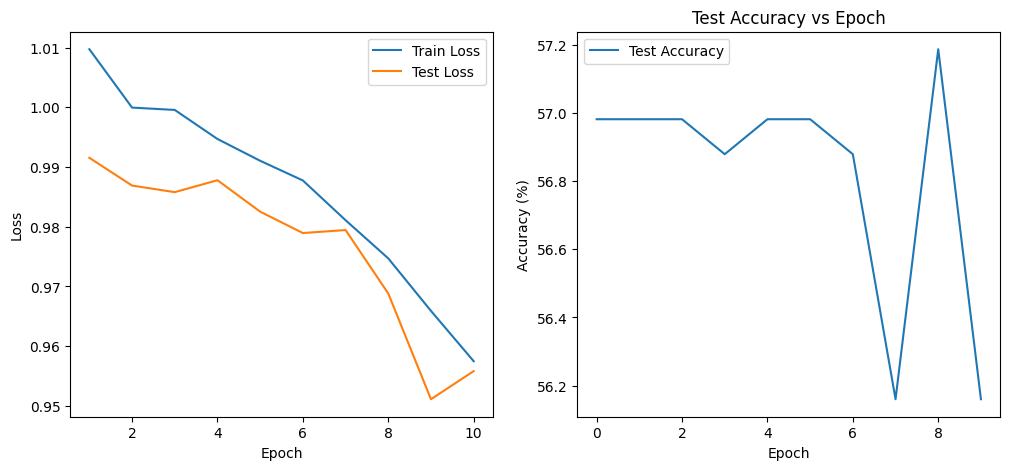

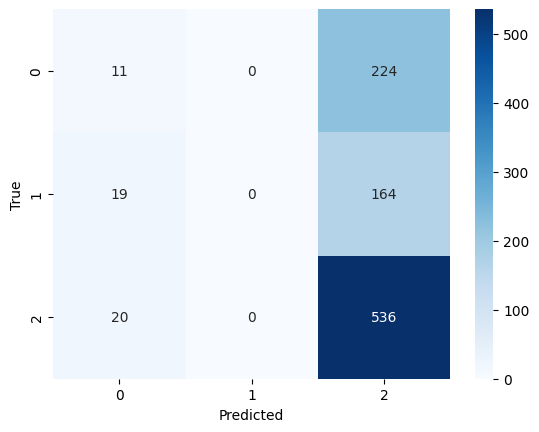

In [ ]:
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, text_model_type='RNN', text_pretrained=pre_embedding)
optimizer = optim.Adam(model.parameters(), lr=0.001)
rnn_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='text')

Epoch 1/10, Train Loss: 1.0152, Test Loss: 0.9772, Accuracy: 57.08%
Epoch 2/10, Train Loss: 0.9654, Test Loss: 0.9698, Accuracy: 56.98%
Epoch 3/10, Train Loss: 0.9455, Test Loss: 0.9283, Accuracy: 58.32%
Epoch 4/10, Train Loss: 0.9257, Test Loss: 0.9203, Accuracy: 58.21%
Epoch 5/10, Train Loss: 0.9149, Test Loss: 0.9117, Accuracy: 59.34%
Epoch 6/10, Train Loss: 0.8973, Test Loss: 0.9128, Accuracy: 59.24%
Epoch 7/10, Train Loss: 0.8858, Test Loss: 0.9133, Accuracy: 59.96%
Epoch 8/10, Train Loss: 0.8703, Test Loss: 0.9565, Accuracy: 59.24%
Epoch 9/10, Train Loss: 0.8571, Test Loss: 0.9381, Accuracy: 59.34%
Epoch 10/10, Train Loss: 0.8429, Test Loss: 0.9357, Accuracy: 58.83%


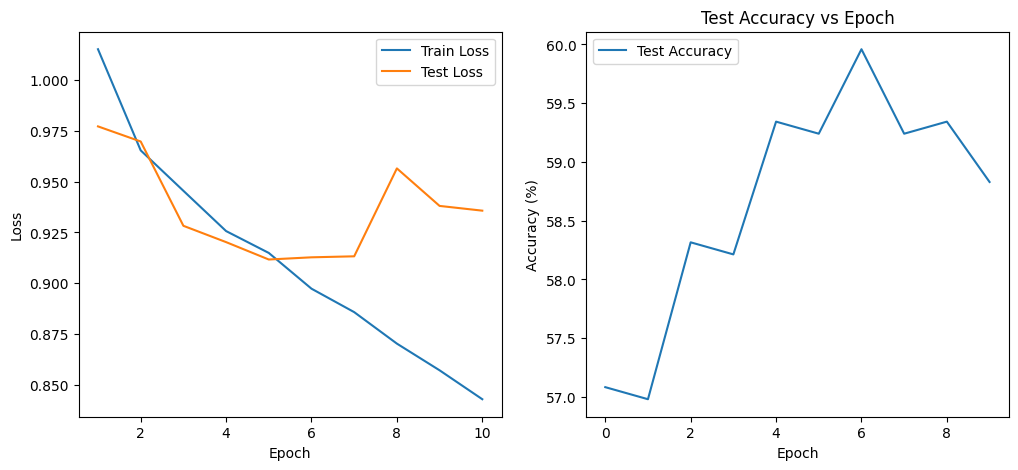

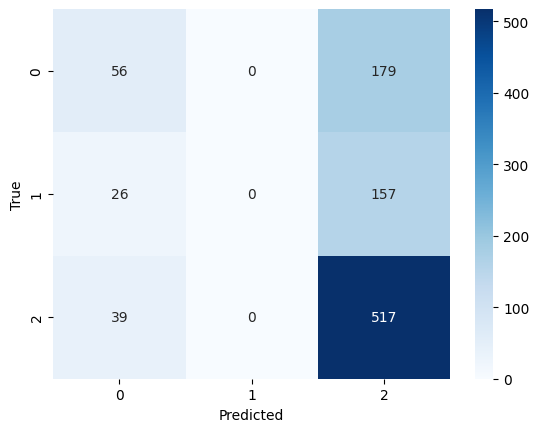

In [ ]:
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, text_model_type='LSTM', text_pretrained=pre_embedding)
optimizer = optim.Adam(model.parameters(), lr=0.001)
lstm_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='text')

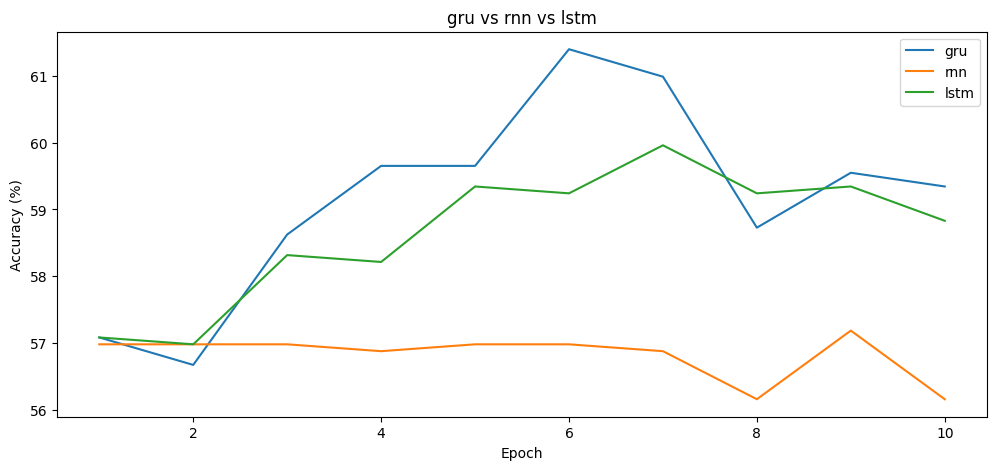

In [ ]:
# gru vs rnn vs lstm
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), gru_pre_accu, label='gru')
plt.plot(range(1, num_epochs+1), rnn_accu, label='rnn')
plt.plot(range(1, num_epochs+1), lstm_accu, label='lstm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('gru vs rnn vs lstm')
plt.legend()

IMAGE and TEXT

/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.9241, Test Loss: 0.8587, Accuracy: 62.73%
Epoch 2/10, Train Loss: 0.8477, Test Loss: 0.8603, Accuracy: 62.94%
Epoch 3/10, Train Loss: 0.8007, Test Loss: 0.8046, Accuracy: 63.14%
Epoch 4/10, Train Loss: 0.7570, Test Loss: 0.7999, Accuracy: 65.40%
Epoch 5/10, Train Loss: 0.7223, Test Loss: 0.8496, Accuracy: 60.16%
Epoch 6/10, Train Loss: 0.7166, Test Loss: 0.7806, Accuracy: 65.91%
Epoch 7/10, Train Loss: 0.6899, Test Loss: 0.8041, Accuracy: 66.12%
Epoch 8/10, Train Loss: 0.6776, Test Loss: 0.7909, Accuracy: 65.61%
Epoch 9/10, Train Loss: 0.6476, Test Loss: 0.8175, Accuracy: 65.71%
Epoch 10/10, Train Loss: 0.6383, Test Loss: 0.8291, Accuracy: 63.55%


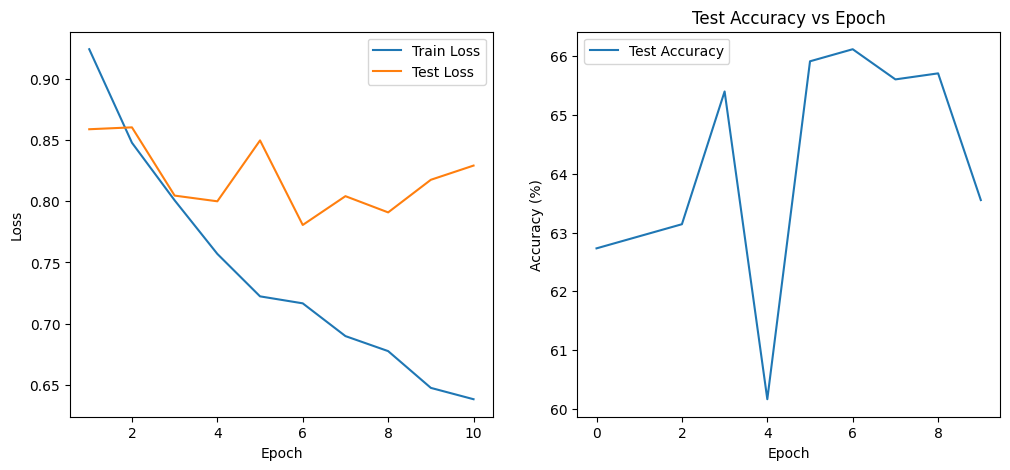

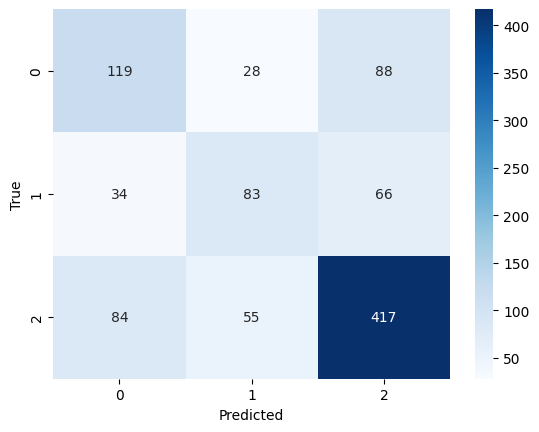

In [ ]:
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, image_model_type='resnet18', text_model_type='GRU', text_pretrained=pre_embedding, freeze=True)
optimizer = optim.Adam(model.parameters(), lr=0.001)
origin_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image_and_text')

Data Distribution

/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 1.0015, Test Loss: 0.9740, Accuracy: 45.59%
Epoch 2/10, Train Loss: 0.9228, Test Loss: 0.9127, Accuracy: 59.34%
Epoch 3/10, Train Loss: 0.8699, Test Loss: 0.9313, Accuracy: 66.12%
Epoch 4/10, Train Loss: 0.8213, Test Loss: 0.8655, Accuracy: 61.09%
Epoch 5/10, Train Loss: 0.8078, Test Loss: 0.8792, Accuracy: 58.11%
Epoch 6/10, Train Loss: 0.7874, Test Loss: 0.8654, Accuracy: 63.55%
Epoch 7/10, Train Loss: 0.7766, Test Loss: 0.8908, Accuracy: 57.70%
Epoch 8/10, Train Loss: 0.7314, Test Loss: 0.9138, Accuracy: 58.42%
Epoch 9/10, Train Loss: 0.7088, Test Loss: 0.8703, Accuracy: 60.37%
Epoch 10/10, Train Loss: 0.6816, Test Loss: 0.9135, Accuracy: 59.24%


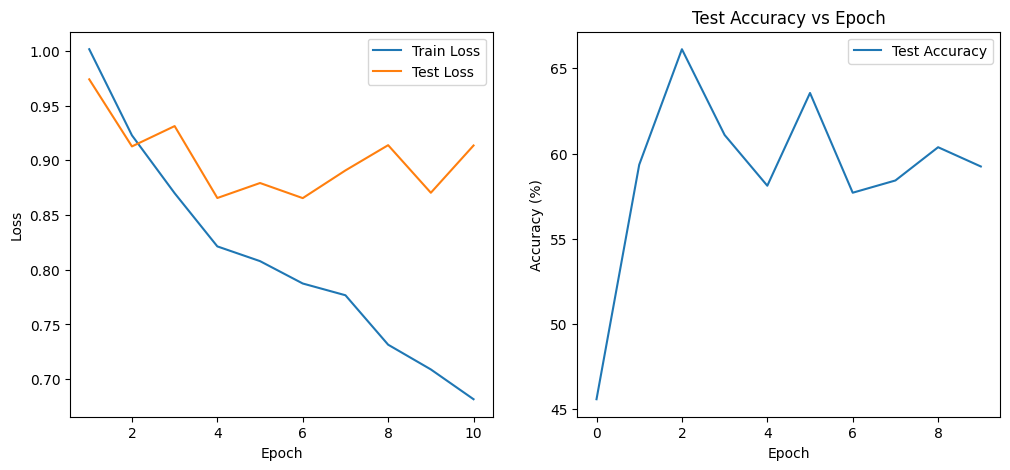

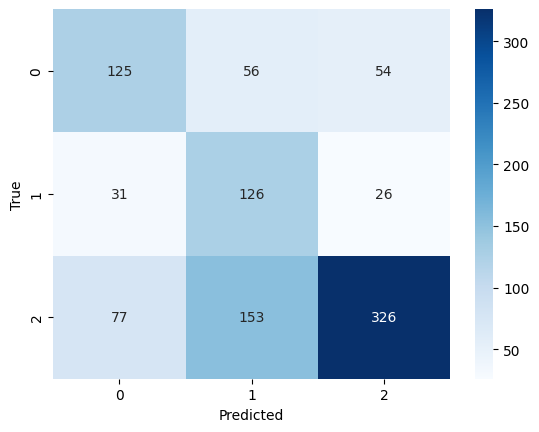

In [ ]:
# loss weights
class_weights = torch.tensor([2.0, 3.0, 1.0]).to('cuda')
criterion = nn.CrossEntropyLoss(weight=class_weights)

model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, image_model_type='resnet18', text_model_type='GRU', text_pretrained=pre_embedding, freeze=True)
optimizer = optim.Adam(model.parameters(), lr=0.001)
weights_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image_and_text')

/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.9248, Test Loss: 1.0292, Accuracy: 38.81%
Epoch 2/10, Train Loss: 0.8574, Test Loss: 1.0334, Accuracy: 39.53%
Epoch 3/10, Train Loss: 0.7749, Test Loss: 1.0170, Accuracy: 41.58%
Epoch 4/10, Train Loss: 0.7321, Test Loss: 1.0537, Accuracy: 43.12%
Epoch 5/10, Train Loss: 0.7203, Test Loss: 0.9808, Accuracy: 45.69%
Epoch 6/10, Train Loss: 0.6788, Test Loss: 0.9376, Accuracy: 54.41%
Epoch 7/10, Train Loss: 0.6454, Test Loss: 0.9566, Accuracy: 50.41%
Epoch 8/10, Train Loss: 0.5908, Test Loss: 0.9835, Accuracy: 53.08%
Epoch 9/10, Train Loss: 0.5498, Test Loss: 1.0011, Accuracy: 56.57%
Epoch 10/10, Train Loss: 0.5429, Test Loss: 1.0783, Accuracy: 48.67%


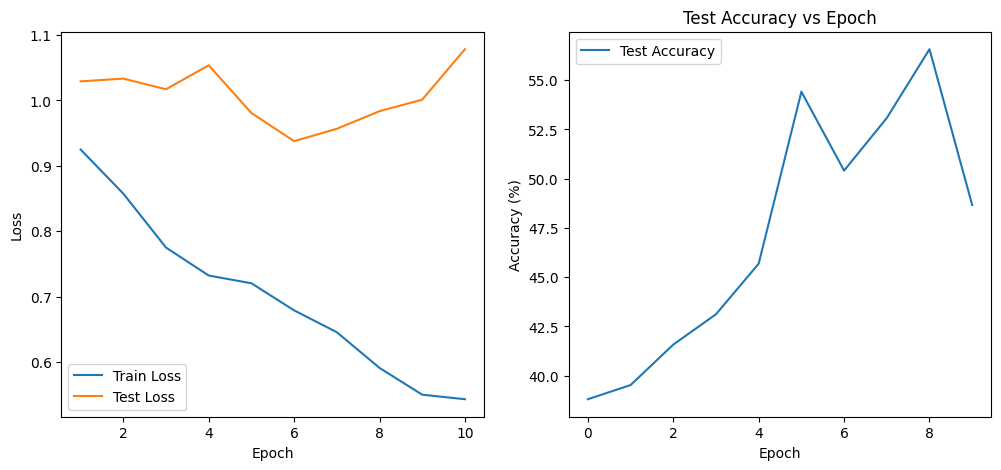

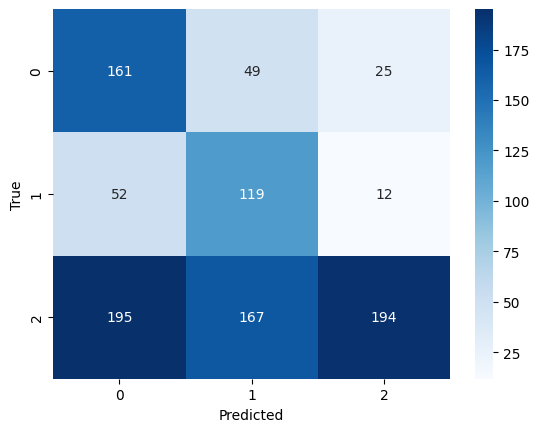

In [ ]:
# resample
# calculate proportion by label
train_labels = [train_dataset[i][2] for i in range(len(train_dataset))]
class_sample_count = [train_labels.count(t) for t in torch.unique(torch.tensor(train_labels))]

# proportion->weight
weights = 1. / torch.tensor(class_sample_count, dtype=torch.float)
samples_weights = torch.tensor([weights[label] for label in train_labels])

# set sampler
sampler = WeightedRandomSampler(samples_weights, num_samples=len(samples_weights), replacement=True)

# use sampler
train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, image_model_type='resnet18', text_model_type='GRU', text_pretrained=pre_embedding, freeze=True)
optimizer = optim.Adam(model.parameters(), lr=0.001)
resample_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image_and_text')

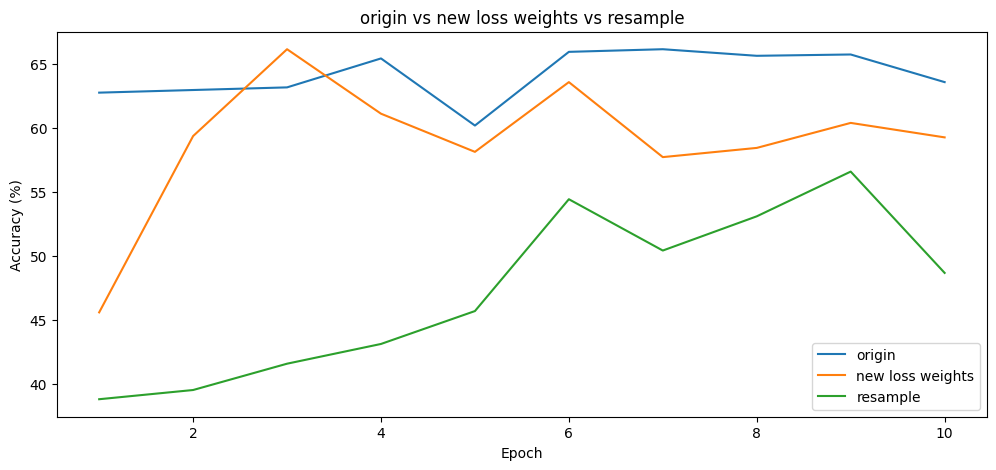

In [ ]:
# origin vs new loss weights vs resample
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), origin_accu, label='origin')
plt.plot(range(1, num_epochs+1), weights_accu, label='new loss weights')
plt.plot(range(1, num_epochs+1), resample_accu, label='resample')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('origin vs new loss weights vs resample')
plt.legend()

# by analyzing confusion matrix
# ability of predicting the other two classes has been elevated, but the final accuracy decreases
# possible reason:
# data_distribution->weight
# data->resample

Bidirectional and Initialize Hidden_layer

Epoch 1/10, Train Loss: 0.9803, Test Loss: 0.9146, Accuracy: 65.09%
Epoch 2/10, Train Loss: 0.8575, Test Loss: 0.8606, Accuracy: 61.70%
Epoch 3/10, Train Loss: 0.8150, Test Loss: 0.8564, Accuracy: 56.98%
Epoch 4/10, Train Loss: 0.7765, Test Loss: 0.8463, Accuracy: 58.32%
Epoch 5/10, Train Loss: 0.7540, Test Loss: 0.8798, Accuracy: 64.99%
Epoch 6/10, Train Loss: 0.7014, Test Loss: 0.8804, Accuracy: 56.26%
Epoch 7/10, Train Loss: 0.6920, Test Loss: 0.8906, Accuracy: 62.32%
Epoch 8/10, Train Loss: 0.6068, Test Loss: 1.0654, Accuracy: 64.78%
Epoch 9/10, Train Loss: 0.5709, Test Loss: 0.9747, Accuracy: 56.88%
Epoch 10/10, Train Loss: 0.4962, Test Loss: 1.0915, Accuracy: 57.08%


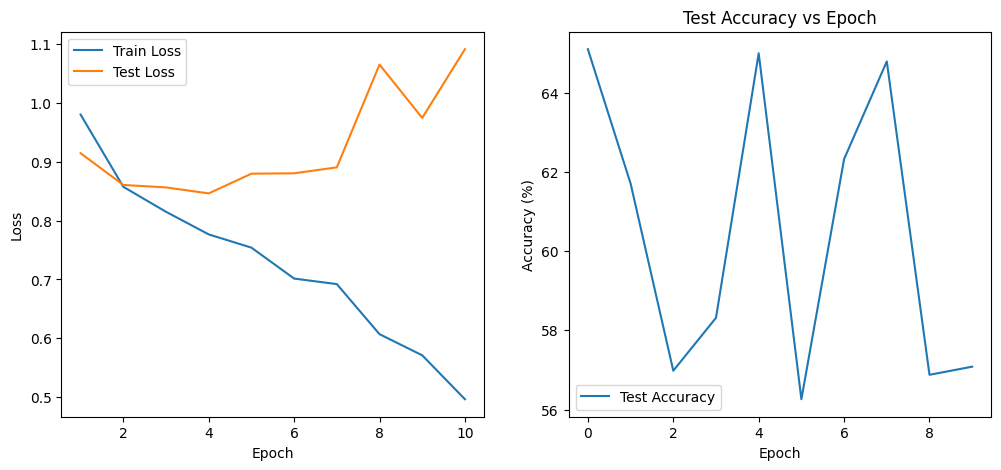

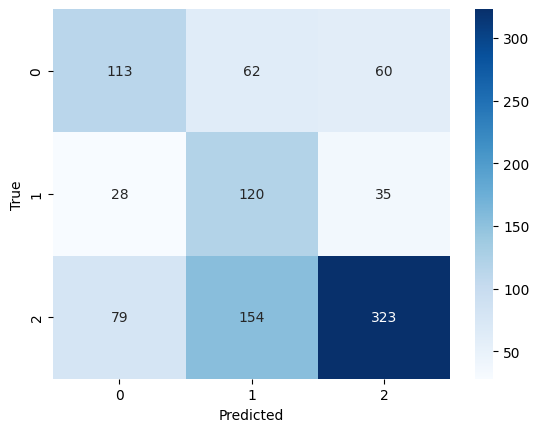

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
model = MultiModalModel(vocab_size, embed_size, hidden_size, output_size, image_model_type='resnet18', text_model_type='GRU', text_pretrained=pre_embedding, freeze=True)
optimizer = optim.Adam(model.parameters(), lr=0.001)
bi_ini_accu = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image_and_text')

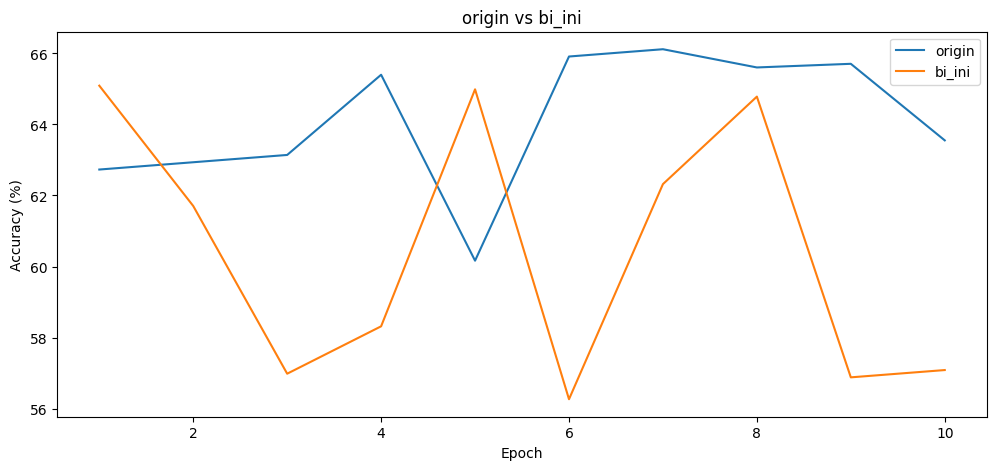

In [ ]:
# origin vs bi_ini
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), origin_accu, label='origin')
plt.plot(range(1, num_epochs+1), bi_ini_accu, label='bi_ini')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('origin vs bi_ini')
plt.legend()

FUNCTION

In [ ]:
def data_filter(img_dir, text_dir, id_list, label_list):
    text_list=[]
    img_list=[]
    lb_list=[]

    for i, idx in enumerate(id_list):
        # start from text
        text_path = os.path.join(text_dir, f"{idx}.txt")
        with open(text_path, 'r', encoding='ascii', errors='ignore') as f:
            data = f.read()
            text = text_preproc(data)
            if len(text)==0:
                continue
            text_list.append(text)

        #image
        img_path = os.path.join(img_dir, f"{idx}.jpg")
        image = Image.open(img_path).convert("RGB")
        img_list.append(image)

        #label
        lb_list.append(label_list[i])

    return img_list, text_list, lb_list

In [ ]:
# to sequence and to tensor and normalization(image)
class CustomMultiModalDataset(Dataset):
    def __init__(self, img_list, text_list, lb_list, transform, max_text, vocab):
        self.img_list = img_list
        self.text_list = text_list
        self.lb_list = lb_list
        self.transform = transform
        self.max_text = max_text

        self.vocab = vocab

    def text_to_sequence(self, text):
        tokens = text.split()
        sequence = [self.vocab.get(token) for token in tokens]
        sequence.extend([self.vocab['<PAD>']] * (self.max_text - len(sequence)))

        return sequence

    def __len__(self):
        return len(self.lb_list)

    def __getitem__(self, idx):
        image = self.img_list[idx]
        image = self.transform(image)

        text = self.text_list[idx]
        sequence = self.text_to_sequence(text)

        label = self.lb_list[idx]

        return image, torch.tensor(sequence, dtype=torch.long), torch.tensor(label, dtype=torch.long)


In [ ]:
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, training_type='image'):
    train_losses = []
    test_losses = []
    test_accuracies = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, sequences, labels in train_loader:
            images, sequences, labels = images.to(device), sequences.to(device), labels.to(device)
            optimizer.zero_grad()

            if training_type == 'image':
                outputs = model(image=images)
            if training_type == 'text':
                outputs = model(text=sequences)
            if training_type == 'image_and_text':
                outputs = model(image=images,text=sequences)

            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_value_(model.parameters(), 1.0)
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, sequences, labels in test_loader:
                images, sequences, labels = images.to(device), sequences.to(device), labels.to(device)

                if training_type == 'image':
                    outputs = model(image=images)
                if training_type == 'text':
                    outputs = model(text=sequences)
                if training_type == 'image_and_text':
                    outputs = model(image=images, text=sequences)

                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(100 * correct / total)
        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, "
              f"Test Loss: {test_losses[-1]:.4f}, "
              f"Accuracy: {test_accuracies[-1]:.2f}%")

    # loss visualization
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Test Accuracy vs Epoch')
    plt.legend()

    plt.show()

    # confusion matrix
    all_preds = []
    all_labels = []

    model.eval()
    with torch.no_grad():
        for images, sequences, labels in test_loader:
            images, sequences, labels = images.to(device), sequences.to(device), labels.to(device)

            if training_type == 'image':
                outputs = model(image=images)
            if training_type == 'text':
                outputs = model(text=sequences)
            if training_type == 'image_and_text':
                outputs = model(image=images, text=sequences)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return test_accuracies

In [ ]:
class MultiModalModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, image_model_type=None, text_model_type=None, text_pretrained=None, freeze=False):
        super(MultiModalModel, self).__init__()
        self.image_model_type=image_model_type
        self.text_model_type=text_model_type
        self.dropout = nn.Dropout(0.5)
        # image
        if self.image_model_type == 'resnet18':
            self.image_model = models.resnet18(pretrained=True)
            num_ftrs = self.image_model.fc.in_features
            if self.text_model_type is not None:
                self.image_model.fc = nn.Linear(num_ftrs, hidden_size)
            else:
                self.image_model.fc = nn.Linear(num_ftrs, output_size)

            if freeze:
                for param in self.image_model.parameters():
                    param.requires_grad = False
                for param in self.image_model.fc.parameters():
                    param.requires_grad = True

        if self.image_model_type == 'vgg16':
            self.image_model = models.vgg16(pretrained=True)
            num_ftrs = self.image_model.classifier[6].in_features
            if self.text_model_type is not None:
                self.image_model.classifier[6] = nn.Linear(num_ftrs, hidden_size)
            else:
                self.image_model.classifier[6] = nn.Linear(num_ftrs, output_size)

            for param in self.image_model.features.parameters():
                param.requires_grad = False

        # text
        if self.text_model_type is not None:
            # embedding layer
            if text_pretrained is not None:
                self.embedding = text_pretrained
            else:
                self.embedding = nn.Embedding(vocab_size, embed_size)

            # sequence unit
            if self.text_model_type == 'RNN':
                self.text_model = nn.RNN(embed_size, hidden_size, batch_first=True)
            elif self.text_model_type == 'LSTM':
                self.text_model = nn.LSTM(embed_size, hidden_size, batch_first=True)
            elif self.text_model_type == 'GRU':
                self.text_model = nn.GRU(embed_size, hidden_size, batch_first=True) # bidirectional=True

            # feaure extraction or classification
            if self.image_model_type is not None:
                self.text_fc = nn.Linear(hidden_size, hidden_size) # 2*hidden_size
            else:
                self.text_fc = nn.Linear(hidden_size, output_size)

        # fuse and classify
        self.fc = nn.Linear(2*hidden_size, output_size)

    def forward(self, image=None, text=None):
        # image
        if self.text_model_type is None:
            image_features = self.image_model(image)  # (batch_size, image_feature_size)
            return image_features

        # text
        if self.image_model_type is None:
            text_embedded = self.embedding(text)  # (batch_size, seq_length, embed_size)
            if self.text_model_type == 'LSTM':
                _, (h_n, _) = self.text_model(text_embedded)
            else:
                _, h_n = self.text_model(text_embedded) # image_features

            h_n = h_n.permute(1, 0, 2)  # reshape
            h_n = h_n.reshape(-1, h_n.shape[1] * h_n.shape[2])
            h_n = self.dropout(h_n)

            text_features = self.text_fc(h_n)
            return text_features

        # fuse
        if self.image_model_type is not None and self.text_model_type is not None:
            image_features = self.image_model(image)  # (batch_size, image_feature_size)
            text_embedded = self.embedding(text)  # (batch_size, seq_length, embed_size)
            if isinstance(self.text_model, nn.LSTM):
                _, (h_n, _) = self.text_model(text_embedded)
            else:
                _, h_n = self.text_model(text_embedded)
            h_n = h_n.permute(1, 0, 2)  # reshape
            h_n = h_n.reshape(-1, h_n.shape[1] * h_n.shape[2])

            text_features = self.text_fc(h_n)

            combined_features = torch.cat((image_features, text_features), dim=1)  # (batch_size, image_feature_size + hidden_size)
            output = self.fc(combined_features)  # (batch_size, output_size)
            return output

In [ ]:
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x=re.sub(r'\\t|\\n','',x)
  x=re.sub(r'rt ','',x)
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  # x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

In [ ]:
def load_glove_embeddings(file_path):
    embedding_dict = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embedding_dict[word] = vector
    return embedding_dict

In [ ]:
def build_vocab(text_list):
    counter = Counter()
    for sentence in text_list:
        counter.update(sentence.split())
    vocab = {word: idx + 1 for idx, (word, _) in enumerate(counter.items())}
    vocab['<PAD>'] = 0
    return vocab